In [1]:
# Module importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from scipy.stats import norm

In [2]:
# df in pd einlesen
data = pd.read_excel("llr_LE1_linear_logistic_regression_pseudo.xlsx")
data

,Klasse,Einkommen,Stresslevel
0,1,6731,6
1,0,3746,2
2,1,9131,9
3,1,12617,9
4,0,1640,1
...,...,...,...
2906,0,4235,2
2907,1,10335,10
2908,1,9649,7
2909,0,2554,1


In [3]:
# x und y Werte definieren
x = data["Einkommen"].values.reshape(-1,1)
y = data["Klasse"].values

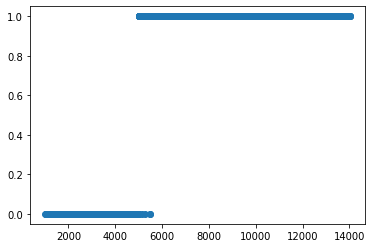

In [4]:
# Scatterplot
plt.scatter(x,y)
plt.show()

In [5]:
# Train und Test daten generieren
train, test = train_test_split(data, test_size = 0.2)

x_train = train["Einkommen"].values.reshape(-1,1)
y_train = train["Klasse"].values

x_test = test["Einkommen"].values.reshape(-1,1)
y_test = test["Klasse"].values

In [6]:
# Logistic Modell erstellen
model = LogisticRegression().fit(x_train, y_train)

In [7]:
# Confusions Matrix
y_test_pre = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_test_pre)
print(conf_matrix)

print(model.score(x_test, y_test))

[[145   1]
 [  0 437]]
0.9982847341337907


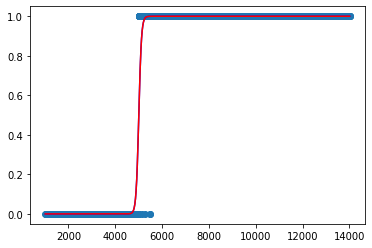

In [8]:
# x_values zum plotten
x_values = np.linspace(min(x), max(x), 1000).reshape(-1,1)
y_values = model.predict_proba(x_values)[:,1]

alpha, beta = model.coef_, model.intercept_
y_values2 = np.exp(beta + alpha * x_values) / (1 + np.exp(beta + alpha * x_values))

plt.scatter(x,y)
plt.plot(x_values, y_values, c = "b")
plt.plot(x_values, y_values, c = "r")
plt.show()


In [9]:
# Die WK dass eine Person mit Einkommen 5k zur Klasse 1 gehoert?
result = model.predict_proba([[5000]])[:,1]
print(result[0]*100, "%")

48.42354798145599 %
